# <center><font color="red">PRCP-1001-RiceLeaf Disease Detection</center>

## PROBLEM STATEMENT
- To prepare a complete data analysis report on the given data.

- To create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

- Analyze various techniques like Data Augmentation etc and create a report on that.

## DOMAIN ANALYSIS AND DATA INFORMATION
- Rice is one of the most important staple crops worldwide, providing sustenance to over half of the world's population. However, rice plants are vulnerable to several diseases that can severely impact the yield and quality of rice production. Some of the major rice diseases that affect rice plants include bacterial leaf blight, brown spot, and leaf smut.
- This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

- Classes :
  - **Leaf smut** caused by the fungus Entyloma oryzae, is a relatively less common rice disease. The symptoms of leaf smut include the formation of small, round, and reddish-brown spots on the leaves. These spots later turn black and produce powdery spores. Although leaf smut does not usually cause significant yield losses, it can affect the quality of rice grains by reducing their weight and size .

  - **Brown spot** caused by the fungus Cochliobolus miyabeanus, is another major rice disease that can cause significant yield losses. The disease is characterized by small, oval to elliptical spots on the leaves, which turn brown with a yellow halo. In severe cases, the spots can coalesce and cause the leaves to wither and die. Brown spot can also affect the panicles, leading to a reduction in grain quality and yield .

  - **Bacterial leaf blight** caused by the bacterium Xanthomonas oryzae pv. oryzae, is a serious disease that can cause extensive damage to rice plants. The symptoms of bacterial leaf blight include water-soaked lesions on the leaves, which later turn brown and dry up. In severe cases, the disease can cause wilting and death of the plant, leading to a significant reduction in crop yield .

## IMPORTING LIBRARIES

In [2]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Rescaling,Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## LOADING DATA

In [4]:
# Path to uploaded file
data_dir = 'D:\PROJECT DATAMITES\PRCP-1001-RiceLeaf\Data'

# Getting path by pathlib
data_dir = pathlib.Path(data_dir)

## CNN Without Data Augmentation

In [6]:
img_height, img_width = 256,256
batch_size = 32

# Create training and testing dataset by image_dataset_from_directory function
train,test=image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="both",
                                        seed=42,
                                        batch_size=batch_size,
                                        image_size=(img_height, img_width))                                       

Found 119 files belonging to 3 classes.
Using 96 files for training.
Using 23 files for validation.


In [7]:
# Class names of the data
class_names = train.class_names
print(class_names)

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


## VISUALIZING DATA

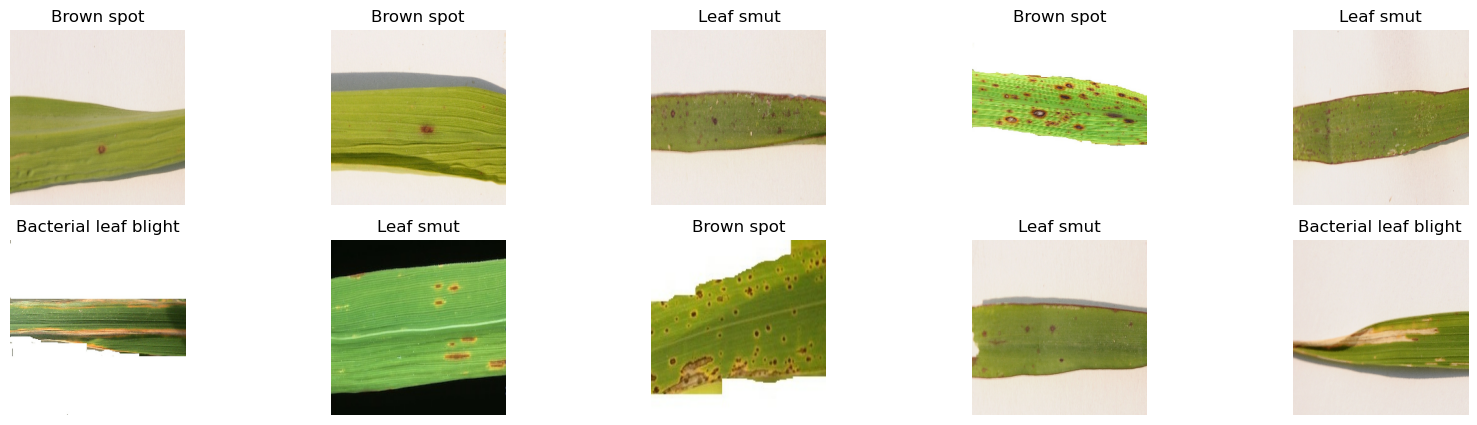

In [9]:
plt.figure(figsize=(20,5))
for images, labels in train.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [10]:
# Check label shape
for images, labels in train:
    print("Image shape:\n",images.shape)
    print("Label shape:\n",labels.shape)
    print("Sample labels:",labels[:5])
    break

Image shape:
 (32, 256, 256, 3)
Label shape:
 (32,)
Sample labels: tf.Tensor([0 0 1 0 1], shape=(5,), dtype=int32)


## MODEL TRAINING ( CNN )

In [12]:
model=Sequential() # Model Initialization
model.add(InputLayer(shape=(256, 256, 3))) # Input Layer
model.add(Rescaling(1./255)) # Rescaling Layer
model.add(Conv2D(filters=16,kernel_size=3,padding='same',activation='relu')) # First Convolutional Layer
model.add(MaxPooling2D(pool_size=2)) # First Max Pooling Layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')) # Second Convolutional Layer
model.add(MaxPooling2D(pool_size=2)) # Second Max Pooling Layer
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')) # Third Convolutional Layer
model.add(MaxPooling2D(pool_size=2)) # Third Max Pooling Layer
model.add(Flatten()) # Flatten Layer
model.add(Dense(500,activation='relu')) # Dense Layer
model.add(Dropout(0.3)) # Dropout Layer
model.add(Dense(10,activation='softmax')) # Output Layer

In [13]:
# Summary of the model 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │      32,768,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,797,094 (125.11 MB)

 Trainable params: 32,797,094 (125.11 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Fitting the training data to the model
model.fit(train,validation_data=test,epochs=200)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.1380 - loss: 2.1704 - val_accuracy: 0.4783 - val_loss: 1.2784
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3112 - loss: 1.4063 - val_accuracy: 0.2174 - val_loss: 1.4928
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4297 - loss: 1.1534 - val_accuracy: 0.3478 - val_loss: 1.2283
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5586 - loss: 0.9330 - val_accuracy: 0.6087 - val_loss: 1.0121
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6628 - loss: 0.7683 - val_accuracy: 0.4783 - val_loss: 1.0366
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7122 - loss: 0.6354 - val_accuracy: 0.8261 - val_loss: 0.7474
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7474 - loss: 0.5696 - val_accuracy: 0.5652 - val_loss: 0.8161
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8542 - loss: 0.4329 - val_accuracy: 0.7826 - val_loss: 0.6046
Epoch 9

In [15]:
# Accuracy score of the model
accuracy=model.evaluate(test)[1]
print('The accuracy for test data is : ',accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.7391 - loss: 2.1993
The accuracy for test data is :  0.739130437374115


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
Accuracy Score:
 0.7391304347826086


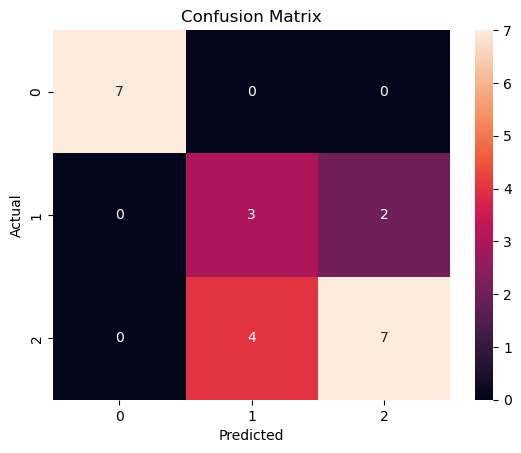

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.43      0.60      0.50         5
           2       0.78      0.64      0.70        11

    accuracy                           0.74        23
   macro avg       0.74      0.75      0.73        23
weighted avg       0.77      0.74      0.75        23



In [16]:
y_test = []
for images, labels in test:  # Iterate over the test dataset
    y_test.extend(labels.numpy())  # Append labels to y_test as numpy arrays
y_test = np.array(y_test)  # Convert to a numpy array
predictions = model.predict(test)  # Predict on the test dataset
pred_class = np.argmax(predictions, axis=1)  # Get the predicted class indices
print("Accuracy Score:\n",accuracy_score(y_test,pred_class))
sns.heatmap(confusion_matrix(y_test,pred_class),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report:",classification_report(y_test,pred_class))

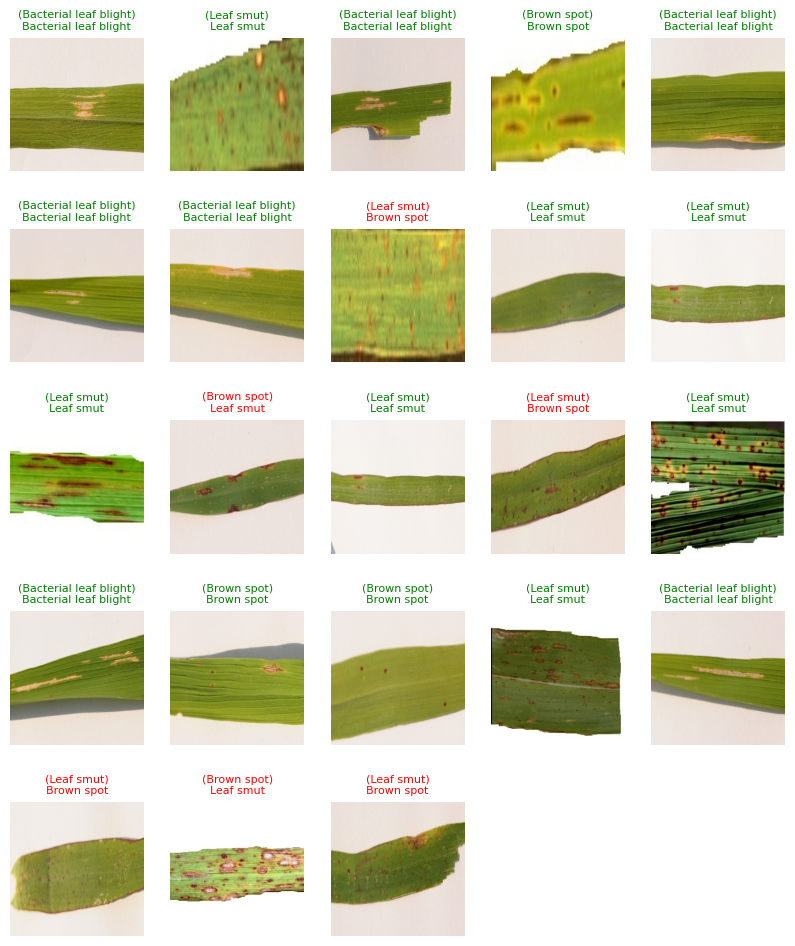

In [17]:
# Visualizing the images in the test data with the prediction is correct or not
plt.figure(figsize=(10, 12))
for images, labels in test.take(1):
  for i in range(23):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title( f"({class_names[labels[i]]})\n{class_names[np.argmax(predictions[i])]}",
              color='green' if labels[i]==np.argmax(predictions[i]) else 'red',fontsize=8)

## Data Augmentation
- Data augmentation is a technique used to increase the size and diversity of a dataset by applying various transformations to the existing data. This technique has become an essential tool in computer vision and image processing tasks, such as object recognition and classification, due to its ability to enhance the generalization ability of machine learning models and prevent overfitting.
- In the context of our rice leaf disease image classification project, data augmentation can play a crucial role in improving the performance and robustness of our model. By generating new images with different variations such as rotations, flips, zooms, and other transformations, we can increase the diversity of our dataset and provide our model with more examples to learn from, which can lead to better classification accuracy and robustness to variations in the real-world data.

## CNN With Data Augmentation

In [19]:
# Data Augmentation Layer
data_augmentation = Sequential([tf.keras.layers.RandomFlip("horizontal_and_vertical"),
                                tf.keras.layers.RandomRotation(0.2),
                                tf.keras.layers.RandomZoom(0.1),
                                tf.keras.layers.RandomContrast(0.1)])
data_augmentation

<Sequential name=sequential_1, built=False>

In [20]:
model=Sequential() # Model Initialization
model.add(InputLayer(shape=(256, 256, 3))) # Input Layer
model.add(Rescaling(1./255)) # Rescaling Layer
model.add(data_augmentation)
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')) # First Convolutional Layer
model.add(MaxPooling2D(pool_size=2)) # First Max Pooling Layer
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')) # Second Convolutional Layer
model.add(MaxPooling2D(pool_size=2)) # Second Max Pooling Layer
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')) # Third Convolutional Layer
model.add(MaxPooling2D(pool_size=2)) # Third Max Pooling Layer
model.add(Flatten()) # Flatten Layer
model.add(Dense(500,activation='relu')) # Dense Layer
model.add(Dropout(0.3)) # Dropout Layer
model.add(Dense(10,activation='softmax')) # Output Layer

In [21]:
# Summary of the model 
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │      65,536,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,634,758 (250.38 MB)

 Trainable params: 65,634,758 (250.38 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Fitting the training data to the model
model.fit(train,validation_data=test,epochs=200)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.2070 - loss: 4.6852 - val_accuracy: 0.3043 - val_loss: 4.5359
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.3294 - loss: 3.6675 - val_accuracy: 0.2174 - val_loss: 1.2781
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.3750 - loss: 1.3334 - val_accuracy: 0.3043 - val_loss: 1.2373
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.4505 - loss: 1.3179 - val_accuracy: 0.3043 - val_loss: 1.3946
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.4453 - loss: 1.1759 - val_accuracy: 0.4348 - val_loss: 1.2150
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.3802 - loss: 1.1845 - val_accuracy: 0.4783 - val_loss: 1.1024
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.3477 - loss: 1.0966 - val_accuracy: 0.3043 - val_loss: 1.3192
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.3789 - loss: 1.2262 - val_accuracy: 0.2174 - val_loss: 1.1990


In [23]:
# Accuracy score of the model_data_aug
accuracy_data_aug=model.evaluate(test)[1]
print('The accuracy for test data is : ',accuracy_data_aug)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step - accuracy: 0.8696 - loss: 0.6021
The accuracy for test data is :  0.8695651888847351


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Accuracy Score:
 0.8695652173913043


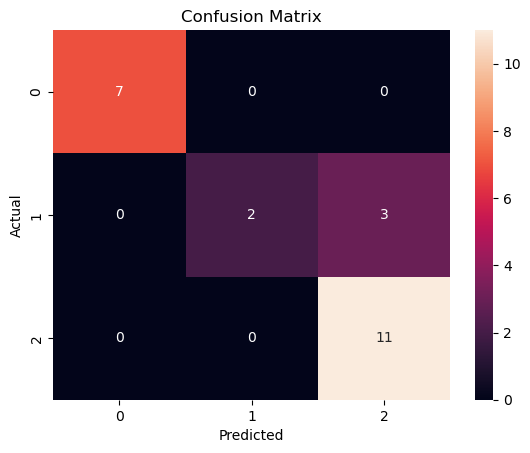

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.40      0.57         5
           2       0.79      1.00      0.88        11

    accuracy                           0.87        23
   macro avg       0.93      0.80      0.82        23
weighted avg       0.90      0.87      0.85        23



In [24]:
predictions = model.predict(test)  # Predict on the test dataset
preds_class = np.argmax(predictions, axis=1)  # Get the predicted class indices
print("Accuracy Score:\n",accuracy_score(y_test,preds_class))
sns.heatmap(confusion_matrix(y_test,preds_class),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report:",classification_report(y_test,preds_class))

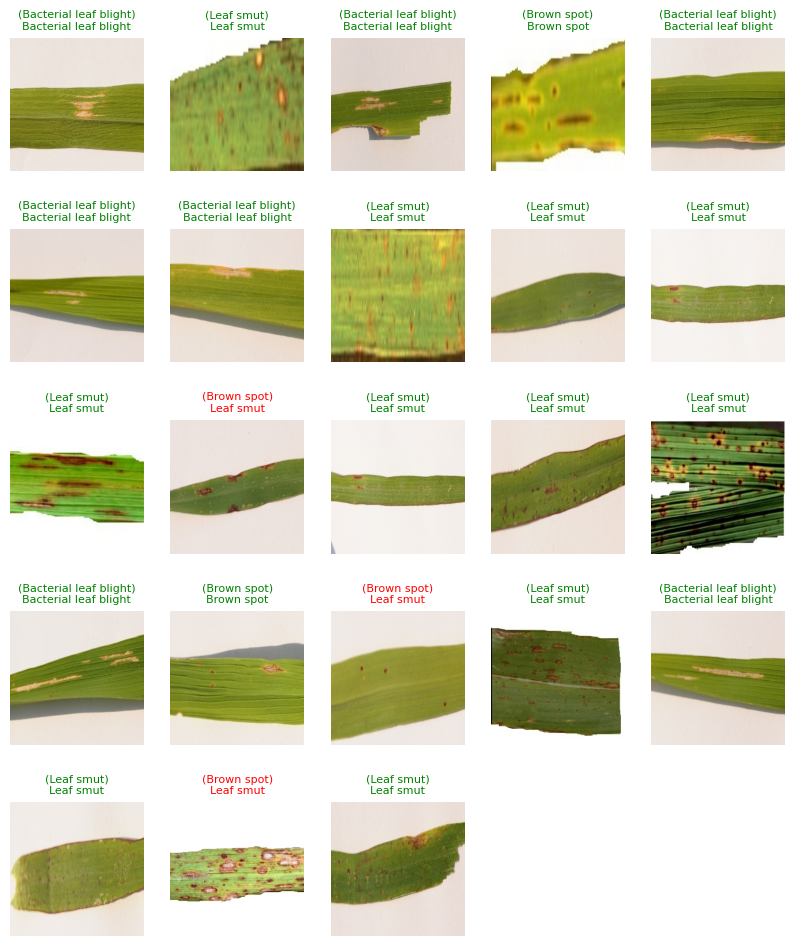

In [25]:
# Visualizing the images in the test data with the prediction is correct or not
plt.figure(figsize=(10, 12))
for images, labels in test.take(1):
  for i in range(23):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title( f"({class_names[labels[i]]})\n{class_names[np.argmax(predictions[i])]}",
              color='green' if labels[i]==np.argmax(predictions[i]) else 'red',fontsize=8)

## RESULTS

In [27]:
print('The accuracy of the CNN model without data aumentation is ', accuracy)
print('The accuracy of the CNN model with data augmentation is ', accuracy_data_aug)

The accuracy of the CNN model without data aumentation is  0.739130437374115
The accuracy of the CNN model with data augmentation is  0.8695651888847351


## CONCLUSION
- The CNN model without data augmentation achieved an accuracy of 74%, while the model with data augmentation reached a higher accuracy of 87%.
- This demonstrates that data augmentation effectively improved the model’s ability to generalize by introducing variability in the training data. It helped reduce overfitting and enhanced overall performance.
- Moreover, the augmented model was better at correctly predicting class labels, as reflected in the improved match between actual and predicted images.

## CHALLENGES FACED
- Limited amount of data(images)
- Complexity of the model
- Hardware limitations

## PROJECT DETAILS:
Project Team ID : PTID-CDS-JAN-25-2368

Project ID : PRCP-1001-RiceLeaf Disease Detection

Team Members:

1. Adithya E - ecadithya12@gmail.com
2. Peraisoodan Viswanath S - peraisoodanviswanath.s@gmail.com
3. Nirmal Newton M - nirmalnewton2003@gmail.com
4. Sivadhasan K - sivadhasansd@gmail.com